<a href="https://colab.research.google.com/github/clairechiu1997/cvlab_2020_winter/blob/master/cvlab_2020_winter_project_A2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!wget -nc 140.114.85.52:8000/pA1.csv
!wget -nc 140.114.85.52:8000/pA2.csv

--2020-02-01 05:13:30--  http://140.114.85.52:8000/pA1.csv
Connecting to 140.114.85.52:8000... connected.
HTTP request sent, awaiting response... 200 OK
Length: 604 [text/csv]
Saving to: ‘pA1.csv’

pA1.csv             100%[===================>]     604  --.-KB/s    in 0s      

2020-02-01 05:13:30 (23.4 MB/s) - ‘pA1.csv’ saved [604/604]

--2020-02-01 05:13:33--  http://140.114.85.52:8000/pA2.csv
Connecting to 140.114.85.52:8000... connected.
HTTP request sent, awaiting response... 200 OK
Length: 631 [text/csv]
Saving to: ‘pA2.csv’

pA2.csv             100%[===================>]     631  --.-KB/s    in 0.001s  

2020-02-01 05:13:33 (1.17 MB/s) - ‘pA2.csv’ saved [631/631]



In [0]:
#@title import data
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import cm

import torch
from torch import nn
from torch.nn import functional as F
from torch.utils.data import Dataset, DataLoader

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler

In [0]:
seed = 999
#let every random solution be the same
torch.manual_seed(seed)
torch.backends.cudnn.deterministic = True

In [24]:
class Data:
    def __init__(self, csv_path):
        super().__init__()
        self.anns = pd.read_csv(csv_path).to_dict('records')

    def __len__(self):
        return len(self.anns)

    def __getitem__(self, idx):
        ann = self.anns[idx]
        x = torch.tensor(ann['x'])
        y = torch.tensor(ann['y'])
        return x, y


class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.w0 = nn.Parameter(torch.rand(1) * 0.001)
        self.w1 = nn.Parameter(torch.rand(1) * 0.001)
        self.w2 = nn.Parameter(torch.rand(1) * 0.001)
    
    def forward(self, xs):
        ps = self.w0 * xs * xs + self.w1 * xs + self.w2
        return ps


data = Data('./pA2.csv')
loader = DataLoader(data, batch_size=5, shuffle=True)

device = 'cpu'
model = Net().to(device)
criterion = nn.L1Loss()
optimizer = torch.optim.Adam(model.parameters(), lr=1e-1)
#1e-1 = 1*10^-1

loss_array = []

for epoch in range(60):
    for xs, ys in iter(loader):
        xs = xs.to(device)
        ys = ys.to(device)

        optimizer.zero_grad()
        #set gradient to 0
        ps = model(xs)
        loss = criterion(ps, ys)
        #ps: predection; ys: ground truth
        loss.backward()
        optimizer.step()
        loss_array.append(loss.detach().item())

print(model.w0)
print(model.w1)
print(model.w2)

Parameter containing:
tensor([-1.9951], requires_grad=True)
Parameter containing:
tensor([1.0261], requires_grad=True)
Parameter containing:
tensor([3.9836], requires_grad=True)


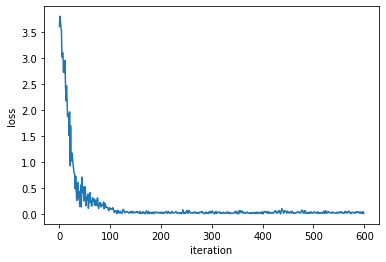

In [25]:
plt.plot(loss_array)
plt.ylabel("loss")
plt.xlabel("iteration")
plt.show()

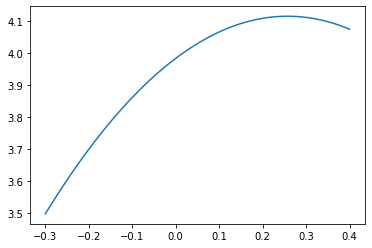

In [26]:
x = np.linspace(-0.3, 0.4, 100)
y = model.w0.item()*x*x + model.w1.item()*x + model.w2.item()

plt.plot(x, y)

# Report
